In [37]:
import pandas as pd
import numpy as np

In [38]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

In [67]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [40]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

In [32]:
?RepeatedKFold

Object `RepeatedKFold` not found.


In [42]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size=0.5)

In [43]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [44]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [45]:
p = modelo.predict(X_valid)

In [46]:
np.mean(y_valid == p)

0.7466367713004485

In [47]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

#Validação cruzada

In [48]:
from sklearn.model_selection import KFold

In [50]:
resultados = []
for rep in range(10):
    print("Rep:", rep)
    kf = KFold(5, shuffle=True, random_state=rep)

    for linhas_treino, linhas_valid in kf.split(X):
        print("Treino:", linhas_treino.shape[0])
        print("Valid:", linhas_valid.shape[0])
        print()
        X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        modelo.fit(X_treino, y_treino)
        p = modelo.predict(X_valid)
        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("acc:", acc)
        print()

Rep: 0
Treino: 712
Valid: 179

acc: 0.7988826815642458

Treino: 713
Valid: 178

acc: 0.7359550561797753

Treino: 713
Valid: 178

acc: 0.7808988764044944

Treino: 713
Valid: 178

acc: 0.797752808988764

Treino: 713
Valid: 178

acc: 0.7808988764044944

Rep: 1
Treino: 712
Valid: 179

acc: 0.7374301675977654

Treino: 713
Valid: 178

acc: 0.7247191011235955

Treino: 713
Valid: 178

acc: 0.7808988764044944

Treino: 713
Valid: 178

acc: 0.7921348314606742

Treino: 713
Valid: 178

acc: 0.7921348314606742

Rep: 2
Treino: 712
Valid: 179

acc: 0.7653631284916201

Treino: 713
Valid: 178

acc: 0.7865168539325843

Treino: 713
Valid: 178

acc: 0.7865168539325843

Treino: 713
Valid: 178

acc: 0.7808988764044944

Treino: 713
Valid: 178

acc: 0.7640449438202247

Rep: 3
Treino: 712
Valid: 179

acc: 0.7653631284916201

Treino: 713
Valid: 178

acc: 0.7471910112359551

Treino: 713
Valid: 178

acc: 0.7808988764044944

Treino: 713
Valid: 178

acc: 0.7415730337078652

Treino: 713
Valid: 178

acc: 0.82022471910

In [51]:
np.mean(resultados)

0.7692593057560732

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [57]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\lbrit\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [58]:
np.mean(resultados)

0.7692593057560732

In [26]:
X_prev.head()

,Sex_binario,Age
0,0,34.5
1,1,47.0
2,0,62.0
3,0,27.0
4,1,22.0


In [27]:
p = modelo.predict(X_prev)

(array([ 4.,  3.,  6.,  3.,  7., 10.,  7.,  6.,  2.,  2.]),
 array([0.70224719, 0.71573034, 0.72921348, 0.74269663, 0.75617978,
        0.76966292, 0.78314607, 0.79662921, 0.81011236, 0.82359551,
        0.83707865]),
 <BarContainer object of 10 artists>)

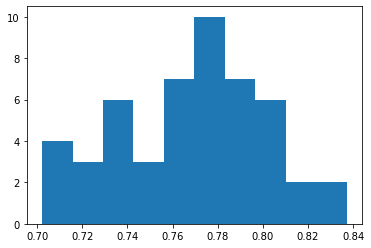

In [59]:
pylab.hist(resultados)

Novas Variáveis

In [68]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [69]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [70]:
X = train[variaveis].fillna(-1)
y = train['Survived']

In [71]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7869955156950673

Treino: 446
Valid: 445
Acc: 0.7797752808988764

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.7847533632286996

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.7842696629213484

Treino: 445
Valid: 446
Acc: 0.8004484304932735

Treino: 446
Valid: 445
Acc: 0.8

Treino: 445
Valid: 446
Acc: 0.8183856502242153

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8116591928251121

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.7887640449438202

Treino: 445
Valid: 446
Acc: 0.8385650224215246

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.7982062780269058

Treino: 446
Valid: 445
Acc: 0.8112359550561797



(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

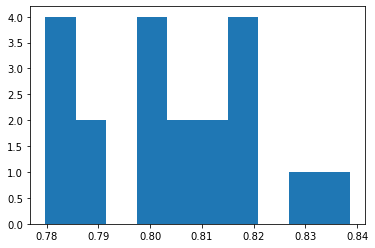

In [72]:
pylab.hist(resultados)

In [65]:
np.mean(resultados)


0.759601451100922

Retreinar o Modelo

In [74]:
X.head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,22.0,3,1,0,7.2500
1,1,38.0,1,1,0,71.2833
2,1,26.0,3,0,0,7.9250
3,1,35.0,1,1,0,53.1000
4,0,35.0,3,0,0,8.0500


In [76]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [78]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [80]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [81]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [82]:
sub.to_csv("segundo_modelo.csv", header=True)

In [83]:
!head -n10 segundo_modelo.csv

'head' não é reconhecido como um comando interno
ou externo, um programa operável ou um arquivo em lotes.
